# **Classifying coronary artery disease using age, blood pressure, blood cholesterol, and maximum heart rate.**
## **Group Report**

#### Zirun Xu, Aura Balita, and Sahil Babani

## Introduction
Coronary artery disease (CAD) is a cardiovascular condition caused by the accumulation of plaque in the coronary arteries, which are responsible for delivering blood to the heart. This plaque buildup gradually narrows the arteries, leading to reduced blood flow to the heart. CAD can lead to abnormal heart rhythms, heart attacks, and heart failure (Cleveland Clinic, n.d.). 

Four factors that increase the likelihood of heart disease are age, blood pressure, blood cholesterol levels and maximum heart rate. Individuals aged 65 and older are more likely to develop CAD due to the buildup of plaque over the years (National Institute on Aging, n.d.), while elevated blood pressure and high blood cholesterol levels are indicative of narrowed blood vessels due to plaque accumulation (Centers for Disease Control and Prevention, n.d.). Lastly, the max heart rate achieved during exercise testing is typically indicative of how well the heart is functioning. A high maximum heart rate usually means a healthier heart, while a lower one can signify a less healthy heart.).

This project aims to determine whether it is possible to predict the likelihood of an individual having heart disease based on their age, blood pressure, blood cholesterol, and maximum heart rate and to determine which variable pairs would best give the best predictions, using the Cleveland database. These variables were selected because analyzing other variables would demand a more in-depth understanding of the subject.

This database was constructed by gathering clinical test results from patients with chest pain symptoms at the Cleveland Clinic in Cleveland, Ohio database (Detrano, et al., 89).

## Methods & Results

(Explain dataset that will be used)\
(Copy and paste variables)\
(Describe the methods and approaches used to collect data)
* Explain data collection techniques
* Explain analytical techinques

### Loading the file and exploring the data
The first step is to load the `tidyverse` and `tidymodels` packages that will be used for the analysis of our data.

In [17]:
# Importing packages
library(tidyverse)
library(tidymodels)
#install.packages("shiny")
library(shiny)

Our heart disease dataset is a `.csv` file with no headers. The `read_csv` function will be used to load the data, and headers will be added using the `colnames()` function. The headers come from the source. The data will then be inspected.

In [18]:
# Loading and adding headers to the heart disease data
heart_data <- read_csv("processed.cleveland.data")
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                     "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
head(heart_data)

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


### Describing the variables in the heart disease data set

Patients experiencing chest pain symptoms, also known as angina, often have a higher probability of being diagnosed with heart disease and are often recommended for coronary angiography. An angiogram involves using x-ray imaging to examine the blood vessels in a person's heart. Its purpose is to assess the condition of these vessels and the circulation of blood within them. At the Cleveland Clinic, 303 patients undergoing coronary angiography had 14 different variables measured.

The information gathered included four clinical details: age, sex, type of chest pain, and systolic blood pressure. Other tests included drawing blood to measure cholesterol levels and blood sugar, electrocardiograms, in which the electrical activity of the heart is measured, thallium scans, in which a radioactive tracer is used to see how much blood is reaching different parts of your heart, and fluoroscopy for coronary calcium, which is a procedure used to look at calcium in the heart's blood vessels.

These variables are described below:

1. **age:** age in years
2. **sex:** sex of the individual (1 = male; 0 = female)
3. **cp:** chest pain type
4. **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
5. **chol:** serum cholesterol in mg/dl
6. **fbs:** whether fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false)
7. **restecg:** resting electrocardiographic results
8. **thalach:** maximum heart rate achieved (in bpm)
9. **exang:** exercise induced angina (1 = yes; 0 = no)
10. **oldpeak:** ST depression induced by exercise relative to rest
11. **slope:** the slope of the peak exercise ST segment
12. **ca:** number of major vessels (0-3) colored by flourosopy
13. **thal:** thalassemia
14. **num:** diagnosis of heart disease (0 = not present; 1, 2, 3, 4 = present)


### Wrangling and cleaning the data
When the database was inspected with the editor, it was found that there were missing values "?" in the table. Thus, the data was cleaned and wrangled into a tidy format by converting the missing data "?" into NA values, and then removing all missing values from the dataset using the `na.omit()` function.

In [19]:
# Converting "?" in cells into "NA"
heart_data[heart_data == "?"] <- NA

# Removing missing values
heart_data <- na.omit(heart_data)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


The variable **num** indicates the diagnosis of the heart disease, with 0 meaning heart disease is not present, and 1, 2, 3, and 4 meaning that heart disease is present. However, this is too confusing. Thus, we will use `mutate()`, `as.factor()`, and `case_when()` to make things more readable. For the case that num = 0, no heart disease occurs, and the disease observation will say "No". For the case that num = 1, 2, 3, 4, heart disease is present, and the disease observation will say "Yes". 

To make things more readable, the following variables will be renamed using `colnames()`:
* **trestbps** to **rest_bp**
* **thalach** to **max_heart**
* **num** to **disease**.

As mentioned in the introduction, we will only be using age, blood pressure, blood cholesterol, maximum heart rate, and the final diagnosis for our analysis. Thus, we will create a new tibble using these five variables using `select()`. The new tibble will be renamed `heart`.

In [20]:
# Selecting and renaming column names
heart <- heart_data |>
    select(age, trestbps, chol, thalach, num)

colnames(heart) <- c("age", "rest_bp", "chol", "max_heart", "disease")

# Converting integer values to "Yes" or "No"
heart <- heart |>
    mutate(disease = as.factor(case_when(disease > 0 ~ "Yes", disease ==  0 ~ "No")))

head(heart)

age,rest_bp,chol,max_heart,disease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,160,286,108,Yes
67,120,229,129,Yes
37,130,250,187,No
41,130,204,172,No
56,120,236,178,No
62,140,268,160,Yes


### Summary of the data

The next step is to perform a summary of the dataset using `group_by()`, `summarize()`, and `n()` to find the number and percentage of disease and no disease observations in our dataset. After, the percentage in each group is found by dividing the total number of observations and multiplying by 100.

There are 137 (46%) disease observations and 159 (54%) no disease observations.

In [21]:
num_obs <- nrow(heart)
heart |>
    group_by(disease) |>
    summarize(
        count = n(),
        percentage = n() / num_obs *100
        )

disease,count,percentage
<fct>,<int>,<dbl>
No,159,53.71622
Yes,137,46.28378


### Splitting the data

(explain why it's important to split the data)

In [22]:
# Splitting the data into the training and testing sets
heart_split <- initial_split(heart, prop = 0.75, strata = disease)  

heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

head(heart_train)

age,rest_bp,chol,max_heart,disease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,130,250,187,No
56,120,236,178,No
57,140,192,148,No
44,120,263,173,No
49,130,266,171,No
64,110,211,144,No


### Summary of data

In [23]:
heart_summary <- heart_train |>
                 group_by(disease) |>
                 summarize(observations = n(), 
                           mean_age = mean(age), 
                           mean_chol = mean(chol),
                           mean_max_heart = mean(max_heart))
heart_summary

disease,observations,mean_age,mean_chol,mean_max_heart
<fct>,<int>,<dbl>,<dbl>,<dbl>
No,119,52.47899,244.8067,158.7143
Yes,102,57.03922,255.3137,137.8431


### Preliminary data visualization

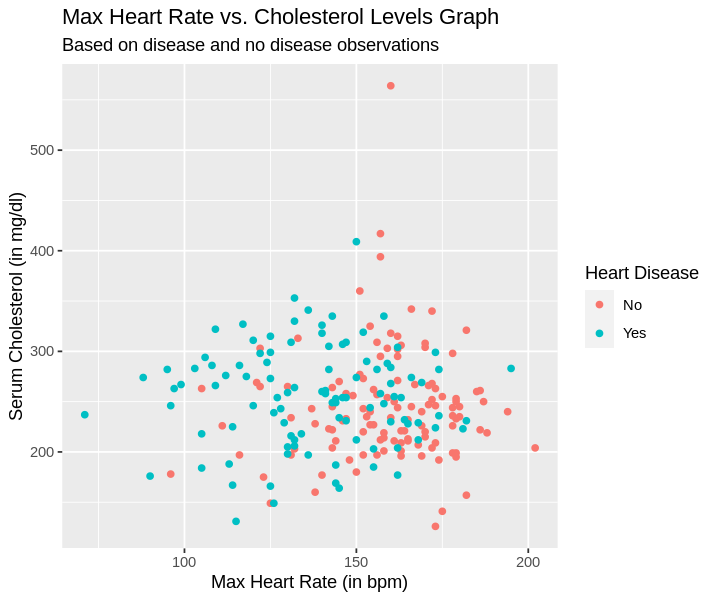

In [24]:
# create a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
# Cholesterol Levels vs. Max Heart Rate
max_heart_chol_plot <- heart_train |>
    ggplot(aes(x = max_heart, y = chol, color = disease)) +
    geom_point() +
        labs(x = "Max Heart Rate (in bpm)",
             y = "Serum Cholesterol (in mg/dl)",
             color = "Heart Disease",
            title = "Max Heart Rate vs. Cholesterol Levels Graph", subtitle = "Based on disease and no disease observations")
max_heart_chol_plot

### Determining the most suitable $k$ value

In [25]:
# add code here
set.seed(1234) 
options(repr.plot.height = 5, repr.plot.width = 6)

recipe <- recipe(disease ~ age + rest_bp + chol + max_heart, data = heart_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

vfold <- vfold_cv(heart_train, v = 5, strata = disease)

k_vals <- tibble(neighbors = seq(from = 2, to = 15, by = 1))

cross_val_fit <- workflow() |>
      add_recipe(recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = vfold, grid = k_vals) |>
      collect_metrics() |>
      filter(.metric == "accuracy")

### Plotting $k$ vs Accuracy

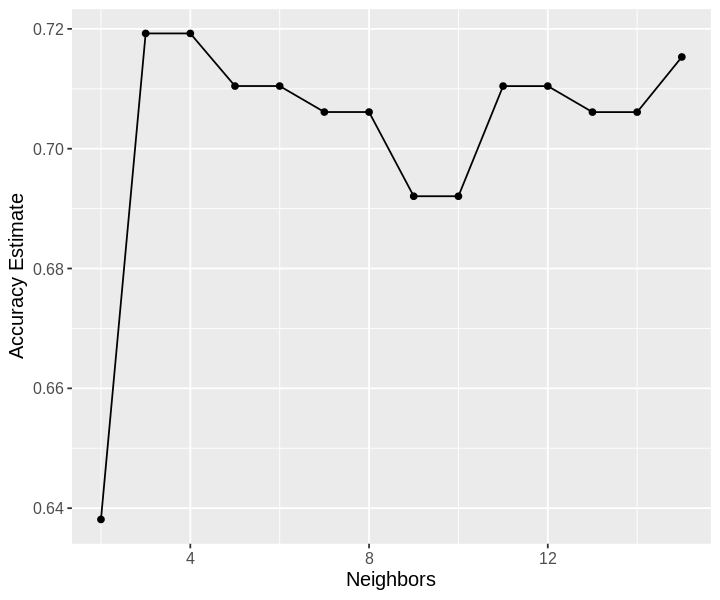

In [26]:
# add code here

cross_val_plot <- ggplot(data = cross_val_fit, aes(x = neighbors, y = mean)) +
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") + 
      theme(text = element_text(size = 12))

cross_val_plot

5-fold cross-validation helps us evaluate the accuracy of the classifier for each value of k by taking the average of the accuracies in each of the 5 resamples. k = 3 is finally chosen because it has the highest mean accuracy.

### Creating a $k$-NN classification model

In [27]:
# add code here
set.seed(1234) 

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
      set_engine("kknn") |>
      set_mode("classification")

heart_fit <- workflow() |>
      add_recipe(recipe) |>
      add_model(heart_spec) |>
      fit(data = heart_train)

### Testing the model against the testing data

In [34]:
# add code here
set.seed(1234) 

heart_predictions <- predict(heart_fit, heart_test) |>
      bind_cols(heart_test)

heart_metrics <- heart_predictions |>
      metrics(truth = disease, estimate = .pred_class)
heart_metrics

heart_conf_mat <- heart_predictions |> 
      conf_mat(truth = disease, estimate = .pred_class)
heart_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5866667
kap,binary,0.1681574


          Truth
Prediction No Yes
       No  25  16
       Yes 15  19

## Discussion
- summarize what you found

In this analysis, we sought to classify the coronary artery disease based on the key indicators of health. With the use of k-Nearest-Neighbours (k-NN) algorithm, we conducted this comprehensive exploration, training and evaluation of the model. The first stage of our model made the dataset undergo through rigorous preprocess, including the handling of missing values and transforming them for clarity. For a better visualisation, a relationship between the maximum heart rate and cholesterol levels was displayed, categorised by the presence and absence of heart disease. 
The k-NN classification model was chosen and optimised through a grid search for the optimal number of neighbours using 5-fold-cross-validation. A plot was also drawn which displayed the algorithm reaching an optimal accuracy when there are 3 to 4 neighbours. On the test data, the k-NN model achieved an accuracy of approximately 58.67% and the Kappa statistic, measuring agreement beyond chance, was approximately 0.168, indicating moderate predictive performance.
Further, the confusion matrix provided a detailed breakdown of model predictions, highlighting correct and incorrect classifications for heart disease and non-heart disease cases.
Lastly, the model demonstrated a nuanced understanding of the relationship between health indicators and heart disease, capturing distinctions in average values for key features and the choice of the number of neighbours played a significant role in influencing the model accuracy, emphasising the importance of hyper parameter tuning.

- discuss whether this is what you expected to find

This is somewhat we were expected to find, however, due to a lower accuracy because of different factors, there is still room of improvement that could be done. Our expected outcome for an indivudual to have heart disease was expected to have have high levels of cholesterol, lower maximum heart rates and probably be older. Our results somewhat align with the expected outcomes in some aspects, but still there are nuances that need to be considered. Our model needs refinement and more in-depth exploration in order for it capture the complexities of heart disease with a higher precision. 

- discuss what impact could such findings have

If this model is refined and brought up to mark where it is capable enough to recognize the complexities, it can have several potential impacts, both in the context of medical and data science as well. It can be used to develop extensive resear


- discuss what future questions could this lead to

1. How can we mitigate bias in heart disease classification algorithms to ensure equitable diagnosis and treatment for all patients.
2. What is the long-term impact of using heart disease classification models. Will it eventually replace doctors?
3. How accurate are disease classification models in general? How can they be improved?

## Conclusions

## References

* [Cleveland Clinic. “Coronary Artery Disease.”](my.clevelandclinic.org/health/diseases/16898-coronary-artery-disease)
* [“Coronary Artery Disease.” Centers for Disease Control and Prevention](www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=To%20find%20out%20your%20risk,about%20heart%20disease%20risk%20factors.) 
* [Detrano, et al. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64 5, 304-10.](https://www.ajconline.org/article/0002-9149(89)90524-9/pdf)
* [“Heart Health and Aging.” National Institute on Aging, U.S. Department of Health and Human Services](https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#how)

